# EDA - Exploratory Data Analytics
# Pre-processing
## 1. Tabular Data - Data collection & integration

*   Missing Imputation
*   Error Correction
*   Encoding
*   Feature Scaling
*   Feature Selection
*   Feature Engineering (You extract extra information from features)
*   Test and Train Splitting

## 2. Text input - Data collection & integration

*   Missing Values
*   Errors - Encoding (UTF-8) ?
*   Uniformization Cases
*   Stop Words
*   (Optional) Stemming / Lemmatization
*   Emoji Translations
*   Multi-lingual - Uniformizations
*   Vectorization (Statistical Vectors vs Embeddings (DL))

In [ ]:
#product - Inventory -> B2B -> tier 2 -> Customer
#Took address - Vectorized - Ranked Similary (Distances = 1-Similary) - Closes address

In [ ]:
docs = ["New GPU benchmarks show faster training time", "GPU benchmark reveals faster model training",
        'The striker scored two goals and an assist point']

In [ ]:
labels = ['base','similar','different']

In [ ]:
#1. Removing Stop words..
#2. Uniformization - Lower or Upper
#3. Stemming and Lemmatization

In [ ]:
#Trained - Training - Train
#Running - Run
#Stemming
  #running - run
  #studies - studi
  #happiness - happi

#Lemmatization
  #Process of reducing words to their lemma (valid dictionary)
  #Morphological tranformations - Vocabolary lookup

  #running - run
  #Studies - study

In [ ]:
import nltk
import re

In [ ]:
nltk.download('all')
#nltk.download('stopwords')

In [ ]:
stop_words = nltk.corpus.stopwords.words("english")

In [ ]:
stop_words = stop_words+['laxmi']

In [ ]:
type(stop_words)

list

In [14]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ['running','studies','happiness','flying','better']
for w in words:
  print(w,"->",stemmer.stem(w))

running -> run
studies -> studi
happiness -> happi
flying -> fli
better -> better


In [15]:
import spacy

In [16]:
nlp = spacy.load("en_core_web_sm")

In [18]:
words = ['running','studies','happiness','flying','better']
doc = nlp(" ".join(words))
for token in doc:
  print(token.text,"->",token.lemma_)

running -> run
studies -> study
happiness -> happiness
flying -> fly
better -> well


In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

words = ['running','studies','happiness','flying','better']
for w in words:
  print(w,"->",lemmatizer.lemmatize(w,pos = 'v'))

running -> run
studies -> study
happiness -> happiness
flying -> fly
better -> better


In [ ]:
stop_words # they'll - they will

In [21]:
nltk.word_tokenize("Hello how are you guys?")

['Hello', 'how', 'are', 'you', 'guys', '?']

In [39]:
def normalize_corpus(doc):
  words = []
  doc = re.sub(r'[^\w\s]',' ',doc,re.IGNORECASE)
  doc = doc.lower()
  doc = nltk.word_tokenize(doc)
  filtered_tokens = [word for word in doc if word not in stop_words]
  doc = " ".join(filtered_tokens)
  tokens = nlp(doc)
  for token in tokens:
    words.append(token.lemma_)
  return " ".join(words)

In [41]:
normalize_corpus("The striker scored two goals and an assist point")

'striker score two goal assist point'

In [27]:
import re
#1. Remove punction
text = "Hello!! How's is cross-tabulation treating you in 2025"
re.sub(r'[^a-zA-Z0-9\s]','',text,flags=re.I)

'Hello Hows is crosstabulation treating you in 2025'

In [28]:
re.sub(r'[^\w\s]','',text,flags=re.I)

'Hello Hows is crosstabulation treating you in 2025'

In [29]:
#Find all HAshtags, Mentions, Emails - We found, PinCODE - Phone Numbers via this only!
text = "Love #InceptezDS25 and #LaxmiSession! Follow @InceptezDS OR INCEPTEZ@GMAIL.COM"
hashtag = re.findall(r'#\w+',text) #after # +	One or more - occurenses of \w - [a-zA-Z0-9_]
print(hashtag)
mention = re.findall(r'@\w+',text)
print(mention)
email = re.findall(r'[\w\.-]+@[\w\.-]+',text)
print(email)

['#InceptezDS25', '#LaxmiSession']
['@InceptezDS', '@GMAIL']
['INCEPTEZ@GMAIL.COM']


In [30]:
import re

txt = "The rain in Spain"
x = re.split("\s", txt)
print(x)

['The', 'rain', 'in', 'Spain']


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-544782604.py:4: SyntaxWarning: invalid escape sequence '\s'
  x = re.split("\s", txt)


In [31]:
print(x)

['The', 'rain', 'in', 'Spain']


In [51]:
docs = ["New GPU benchmarks show faster training time GPU", "GPU benchmark reveals faster model training",
        'The striker scored two goals and an assist point']
labels = ['base','similar','different']

In [58]:
import numpy as np
normalize_corpus = np.vectorize(normalize_corpus)
norm_corpus = normalize_corpus(docs)

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [110]:
cv = CountVectorizer(lowercase=True,stop_words='english')
X_count = cv.fit_transform(norm_corpus)

In [104]:
#N-gram vectors

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,2))
X_count = cv.fit_transform(norm_corpus)

In [111]:
X_count.toarray()

array([[0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]])

In [112]:
vocab = cv.get_feature_names_out()

In [113]:
vocab

array(['assist', 'benchmark', 'fast', 'goal', 'gpu', 'model', 'new',
       'point', 'reveal', 'score', 'striker', 'time', 'training'],
      dtype=object)

In [114]:
pd.DataFrame(X_count.toarray(),columns=vocab)

,assist,benchmark,fast,goal,gpu,model,new,point,reveal,score,striker,time,training
0,0,1,1,0,2,0,1,0,0,0,0,1,1
1,0,1,1,0,1,1,0,0,1,0,0,0,1
2,1,0,0,1,0,0,0,1,0,1,1,0,0


In [65]:
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_tfidf = tfidf.fit_transform(norm_corpus)

In [68]:
vocab = tfidf.get_feature_names_out()

In [69]:
pd.DataFrame(X_tfidf.toarray(),columns=vocab)

,assist,benchmark,fast,goal,gpu,model,new,point,reveal,score,striker,time,training
0,0.000000,0.309228,0.309228,0.000000,0.618457,0.000000,0.406598,0.000000,0.000000,0.000000,0.000000,0.406598,0.309228
1,0.000000,0.366180,0.366180,0.000000,0.366180,0.481482,0.000000,0.000000,0.481482,0.000000,0.000000,0.000000,0.366180
2,0.447214,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.447214,0.000000,0.447214,0.447214,0.000000,0.000000


In [71]:
#King - Man + Woman = Queen

In [ ]:
#difference between Distance -> how far? and Similarity -> how close?
#Similarity = 1-Distance

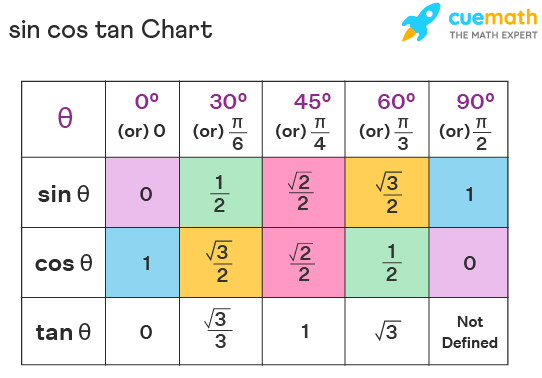

In [72]:
from sklearn.metrics.pairwise import cosine_distances

In [80]:
def cossim_matrix(X):
  D = 1-cosine_distances(X)
  return pd.DataFrame(D,columns=labels,index=labels)

In [81]:
docs = ["New GPU benchmarks show faster training time GPU", "GPU benchmark reveals faster model training",
        'The striker scored two goals and an assist point']
labels = ['base','similar','different']

In [82]:
cosdist_matrix(X_count)

,base,similar,different
base,1.000000,0.680414,0.0
similar,0.680414,1.000000,0.0
different,0.000000,0.000000,1.0


In [83]:
cosdist_matrix(X_tfidf)

,base,similar,different
base,1.000000,0.566166,0.0
similar,0.566166,1.000000,0.0
different,0.000000,0.000000,1.0


In [ ]:
#1. Document Similarity / Plagiarism Detection
#2. Information Retrieval search engines
#3. Text Classification
#4. Duplicate Questions - Q&A site
#4. FAQ matching
#5. Text-Based Recommendations
#6. Topic - Keyword Extraction